<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">M2.859 - Visualización de datos aula 1</p>
    <p style="margin: 0; padding-top: 22px; text-align:right;">A5: Estudio de técnicas de visualización de datos (PEC2)</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Visualización de datos aula 1 - PEC2
============================

Este notebook se crea para tener la visualización de tres estilos de gráficas a partir de un conjunto de datos diferentes para cada una. Se adicionan descripciones de los dataset y objetivos de cada una de las visualizaciones trabajadas; las cuales son:
 
* **Treemap**
* **Parallel Coordinates Plot**
* **Bullet Graphs**

**Estudiante:** Federico Clavijo Lòpez

**Usuario:** fclavijo0


In [1]:
import pandas as pd
import csv
import re
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Gráfico 1: Treemap

Los Treemap muestran datos jerárquicos (estructurados en árbol) como un conjunto de rectángulos anidados. A cada rama del árbol se le da un rectángulo, que luego se teja con rectángulos más pequeños que representan sub-ramas. El rectángulo de un nodo hoja tiene un área proporcional a una dimensión específica de los datos. 

In [2]:
dt1 = pd.read_csv("accident.csv", sep=',', encoding='latin-1')
dt1.head()

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS,DRUNK_DR
0,1,Alabama,10001,1,1,0,0,4,4,0,...,3,3:00am-3:59am,10,10,99,Unknown,99,Unknown EMS Hospital Arrival Time,3,1
1,1,Alabama,10002,4,4,0,0,6,6,0,...,17,5:00pm-5:59pm,26,26,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
2,1,Alabama,10003,2,2,0,0,2,2,0,...,15,3:00pm-3:59pm,15,15,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
3,1,Alabama,10004,1,1,0,0,5,5,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,...,0,0:00am-0:59am,55,55,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0


In [3]:
n = len(dt1)
n

35766

In [5]:
#state = dt1.groupby('STATENAME')[['STATENAME']].sum()
state = dt1.groupby('STATENAME')[['FATALS']].sum()
state.head()

,FATALS
STATENAME,
Alabama,934
Alaska,64
Arizona,1054
Arkansas,638
California,3847


In [6]:
a = dt1.groupby('STATENAME')[['FATALS']].sum().index.get_level_values(0).tolist()
print(a)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [7]:
d = dt1.groupby('STATENAME')[['FATALS']].sum().reset_index().FATALS.values.tolist()
print(d)

[934, 64, 1054, 638, 3847, 622, 295, 116, 36, 3331, 1664, 85, 214, 1194, 897, 337, 426, 780, 828, 164, 567, 343, 1084, 394, 752, 987, 213, 233, 317, 104, 584, 398, 1046, 1538, 100, 1230, 652, 508, 1129, 67, 1064, 141, 1217, 3874, 276, 62, 850, 560, 267, 614, 127]


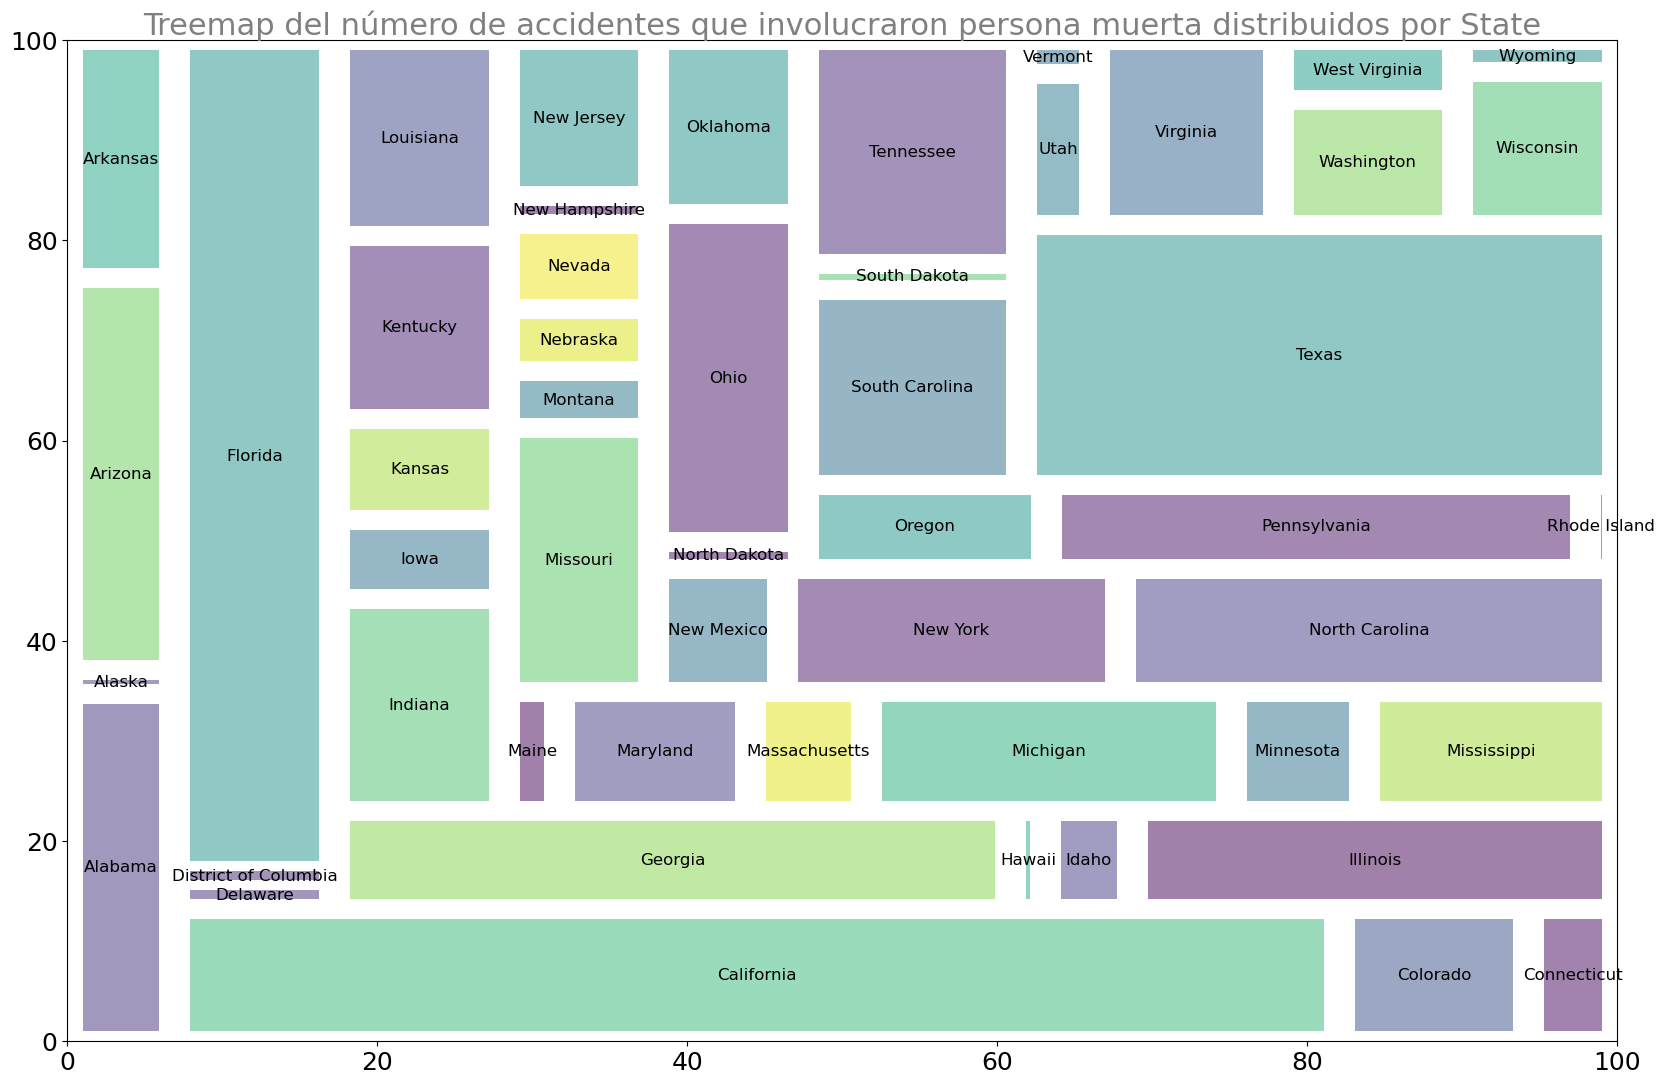

In [8]:
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 23

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.figure(figsize=(20,13))

squarify.plot(sizes=d, label=a, alpha=.5, pad=True)
plt.axis('on')

plt.text(50, 100,
         'Treemap del número de accidentes que involucraron persona muerta distribuidos por State',
         fontsize = 22, 
         color='grey', 
         horizontalalignment='center',
         verticalalignment='bottom')

plt.show()

In [9]:
state1 = pd.crosstab(index = dt1['STATENAME'], columns='freq')
state1.head()

col_0,freq
STATENAME,
Alabama,852
Alaska,53
Arizona,967
Arkansas,585
California,3558


In [10]:
a_aux = pd.crosstab(index = dt1['STATENAME'], columns='freq').index.get_level_values(0).tolist()
print(a_aux)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [11]:
d_aux = pd.crosstab(index = dt1['STATENAME'], columns='freq').reset_index().freq.values.tolist()
print(d_aux)

[852, 53, 967, 585, 3558, 574, 279, 104, 34, 3098, 1522, 81, 188, 1087, 815, 304, 382, 709, 762, 151, 540, 327, 1011, 369, 687, 914, 190, 217, 293, 98, 547, 365, 963, 1412, 96, 1154, 599, 461, 1060, 66, 962, 132, 1119, 3520, 256, 58, 796, 525, 249, 561, 114]


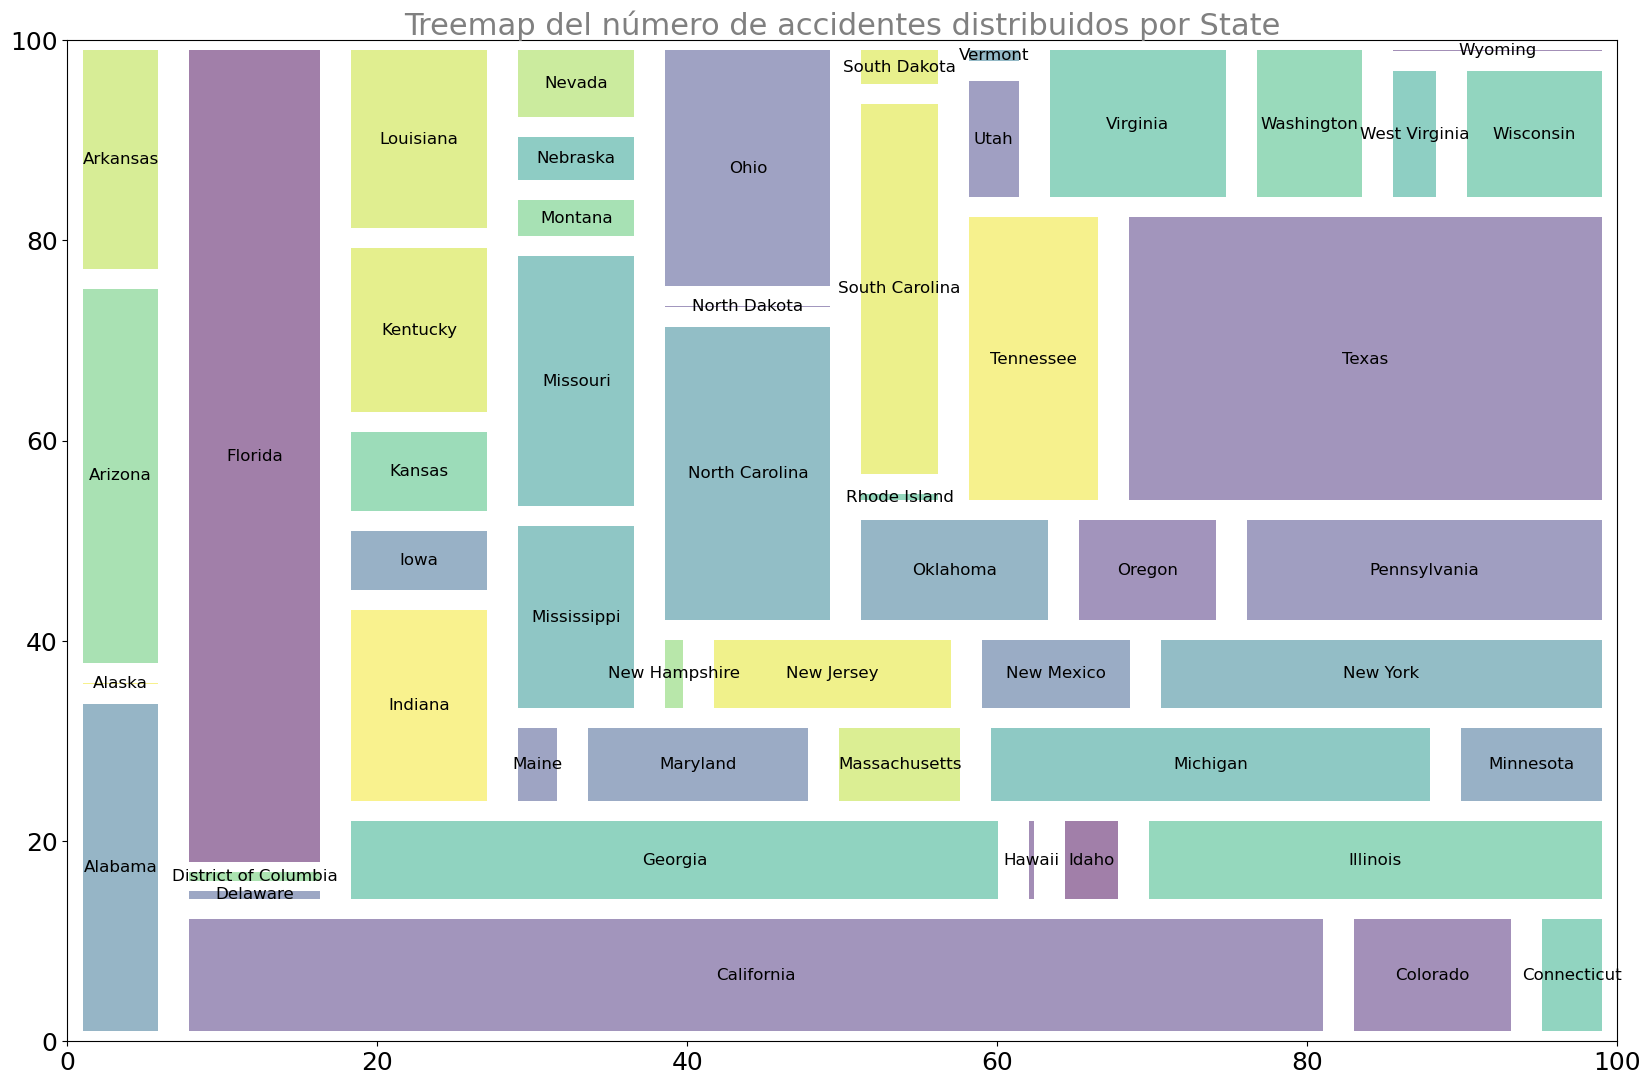

In [12]:
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 23

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.figure(figsize=(20,13))

squarify.plot(sizes=d_aux, label=a_aux, alpha=.5, pad=True)
plt.axis('on')

plt.text(50, 100,
         'Treemap del número de accidentes distribuidos por State',
         fontsize = 22, 
         color='grey', 
         horizontalalignment='center',
         verticalalignment='bottom')

plt.show()

**Análisis:**
El tipo de gráfico treemap permite visualizar variables cualititativas en función del total de observaciones, permitiendo reconocer la participación porcentual de cada elemento en funciónd el total, su estructura es jerárquica.

# Gráfico 2: Parallel Coordinates Plot

La  visualización de Parallel Coordinates es una forma común de visualizar un conjunto de datos multivariados. Esta visualización está estrechamente relacionada con ver datos de forma secuencial, su orden en el eje x es arbitrario. 

In [13]:
state_aux = dt1.groupby('STATENAME')[['PEDS', 'FATALS']].sum()
state_aux.head()

,PEDS,FATALS
STATENAME,,
Alabama,118,934
Alaska,16,64
Arizona,286,1054
Arkansas,96,638
California,1215,3847


In [15]:
fig = px.parallel_coordinates(state_aux, color='PEDS',
                              dimensions=['PEDS', 'FATALS'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [28]:
state_aux1 = dt1.groupby('STATENAME')[['PEDS', 'FATALS', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL']].sum()
state_aux1.head()

,PEDS,FATALS,VE_TOTAL,VE_FORMS,PVH_INVL
STATENAME,,,,,
Alabama,118,934,1324,1306,18
Alaska,16,64,82,80,2
Arizona,286,1054,1499,1469,30
Arkansas,96,638,853,847,6
California,1215,3847,5507,5268,239


In [29]:
fig1 = px.parallel_coordinates(state_aux1, color='FATALS',
                              dimensions=['PEDS', 'FATALS', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=5)
fig1.show()

**Análisis:**
El tipo de gráfico parallel coordinates plot permite identificar un conjunto de datos multivariables, donde se puede ver variaciones de variables en función de otras variables deseadas.

# Gráfico 3: Bullet Graphs

Un bullet graphs es una variación de un gráfico de barras. Esta visualización sirve para identificar variables a través de valores límites, rangos e indicadores de la misma. 

In [30]:
# Valores totalizados
state_PEDS = dt1.groupby('STATENAME')[['PEDS']].sum()
state_PEDS.head()

,PEDS
STATENAME,
Alabama,118
Alaska,16
Arizona,286
Arkansas,96
California,1215


In [41]:
fig = go.Figure(go.Indicator(
    mode = "number+gauge+delta",
    gauge = {'shape': "bullet",
            'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 150}},
    value = 118,
    delta = {'reference': 860},
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Alabama"}))
fig.update_layout(height = 220)

fig1 = go.Figure(go.Indicator(
    mode = "number+gauge+delta",
    gauge = {'shape': "bullet",
            'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 900}},
    value = 860,
    delta = {'reference': 860},
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Texas"}))
fig1.update_layout(height = 220)

fig.show()
fig1.show()

**Análisis:**
El tipo de gráfico bullet permite una comparación sencilla de variables alrededor de un valor determinado. Se puede identificar diferencias entre variables y rangos relevantes a considerar.

### Fuentes utilizadas en el desarrollo de la PEC

1. Data Viz Project 2023; Ferdio; Definition and examples of treemap. Link: https://datavizproject.com/data-type/treemap/

2. Data Viz Project 2023; Ferdio; Definition and examples of Parallel coordinates. Link: https://datavizproject.com/data-type/parallel-coordinates/

3. Data Viz Project 2023; Ferdio; Definition and examples of bullet graph. Link: https://datavizproject.com/data-type/bullet-graph/